In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA





import pickle

In [118]:
df=pd.read_csv("loan_data.csv")
df

,Customer_id,Age,Gender,Income,Credit_score,Credit_score_category,Loan_amount,Interest_rate,Loan_term,Loan_type,...,Transaction_data,Transaction_month,Transaction_year,Transaction_freq,Product_id,Product_names,Interaction_type,Interaction_date,Interaction_month,Interaction_year
0,C0124,66,Male,108296,627,Fair,225098,1.82,12,Education,...,2024-07-30,7,2024,4,P003,Credit Card,purchased,2024-06-03,6,2024
1,C0119,25,Male,88437,589,Fair,109731,10.80,60,Auto,...,2023-06-17,6,2023,10,P015,Home Equity Line,purchased,2023-05-25,5,2023
2,C044,21,Male,93447,832,Excellent,261695,12.24,48,Auto,...,2024-11-28,11,2024,7,P028,Debt Consolidation Loan,purchased,2024-04-08,4,2024
3,C0148,55,Male,138441,845,Excellent,368030,5.67,48,Auto,...,2023-11-07,11,2023,8,P035,Real Estate Investment,purchased,2024-12-15,12,2024
4,C0196,22,Female,184615,606,Fair,257577,5.96,12,Business,...,2024-11-28,11,2024,6,P036,International Investment,viewed,2023-02-04,2,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0115,62,Male,124501,756,Excellent,378734,4.60,36,Auto,...,2023-08-25,8,2023,6,P004,Personal Loan,purchased,2023-08-03,8,2023
996,C072,42,Male,147282,304,Poor,128694,3.91,12,Business,...,2024-09-07,9,2024,1,P009,Investment Fund,purchased,2023-05-21,5,2023
997,C067,42,Male,161293,477,Poor,120091,2.05,12,Mortgage,...,2023-05-12,5,2023,3,P033,Wealth Management,viewed,2023-06-11,6,2023
998,C016,38,Female,184499,768,Excellent,489486,10.24,24,Mortgage,...,2024-04-15,4,2024,5,P012,Mutual Fund,viewed,2023-08-31,8,2023


In [119]:
le = LabelEncoder()

df["Transaction_Type_Encoded"] = le.fit_transform(df["Transaction_type"])

feature = df[["Transaction_amt", "Transaction_freq", "Transaction_Type_Encoded"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature)

In [120]:
from sklearn.cluster import KMeans
inertia_values = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans_check = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans_check.fit(scaled_features)
    inertia_values.append(kmeans_check.inertia_)

inertia_values

[3000.000000000001,
 1999.649839187593,
 1767.1141087356027,
 1329.0854893289884,
 1017.0042340734633,
 756.1974461048021,
 612.0442045353205,
 479.7271535567651,
 452.46451949124094,
 415.6845428695115,
 387.95037484126374,
 348.64565991171594,
 324.66772834048237,
 297.6425960591442]

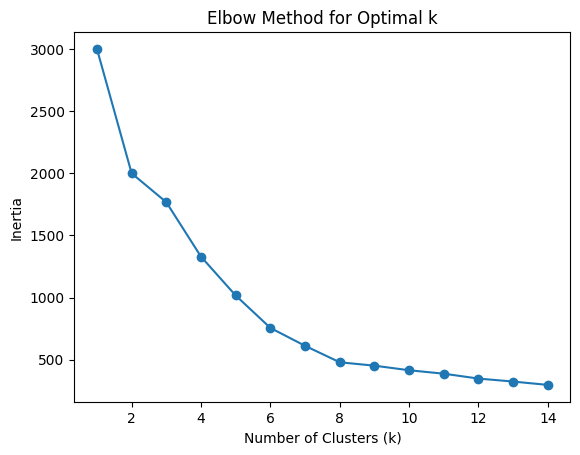

In [121]:
import matplotlib.pyplot as plt

# List of corresponding k values (number of clusters)
k_values = list(range(1, len(inertia_values) + 1))

# Plot inertia vs. number of clusters
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [122]:


#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pickle

le = LabelEncoder()

df["Transaction_Type_Encoded"] = le.fit_transform(df["Transaction_type"])

feature = df[["Transaction_amt", "Transaction_freq", "Transaction_Type_Encoded"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature)

kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(scaled_features)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(scaled_features, k_means_clusters)
dbi_kmeans = davies_bouldin_score(scaled_features, k_means_clusters)

print(f'Cluster: 8')

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')



Cluster: 8
Silhouette Score for kmeans: 0.41851512900000665
Davies-Bouldin Index for kmeans: 0.7608295265648446


In [123]:
kmeans_7 = KMeans(n_clusters=7, init='k-means++', random_state=42)
k_means_clusters = kmeans_7.fit_predict(scaled_features)

silhouette_avg_kmeans = silhouette_score(scaled_features, k_means_clusters)
dbi_kmeans = davies_bouldin_score(scaled_features, k_means_clusters)

print(f'Cluster: 7')
print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

Cluster: 7
Silhouette Score for kmeans: 0.4038073758840636
Davies-Bouldin Index for kmeans: 0.7911775934060296


In [124]:
kmeans_9 = KMeans(n_clusters=9, init='k-means++', random_state=42)
k_means_clusters = kmeans_9.fit_predict(scaled_features)

silhouette_avg_kmeans = silhouette_score(scaled_features, k_means_clusters)
dbi_kmeans = davies_bouldin_score(scaled_features, k_means_clusters)

print(f'Cluster: 9')
print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

Cluster: 9
Silhouette Score for kmeans: 0.38811800434529153
Davies-Bouldin Index for kmeans: 0.8511126313169416


Optimal Cluster Insights:  

Based on the Silhouette Score, 8 clusters seem to provide the best balance of cohesion and separation, as it has the highest score (0.4185).
The Davies-Bouldin Index also supports 8 clusters as optimal, with the lowest score (0.7608), indicating better-defined clusters.


Recommendation:

Cluster: 8 appears to be the most optimal choice among the three options, as it balances both metrics effectively.

In [125]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

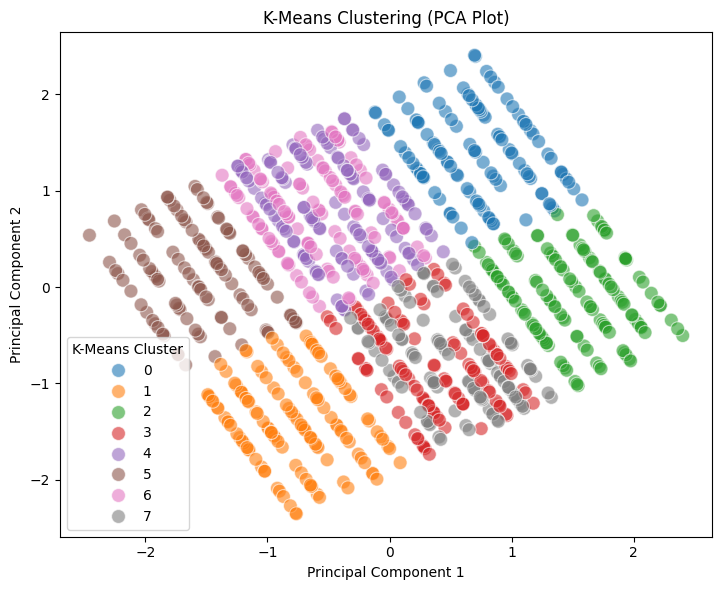

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

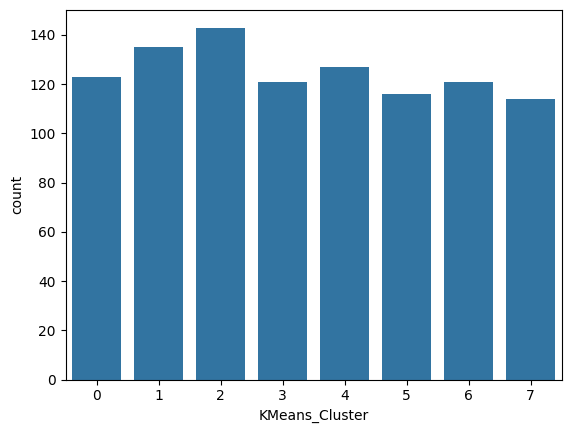

In [126]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sns.countplot(x="KMeans_Cluster", data=df)

In [133]:
# Save models
with open('scaler_kmeans.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('le_kmeans.pkl', 'wb') as f:
    pickle.dump(le, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = le.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler.transform(input_data)
    
    cluster = kmeans.predict(scaled_input_data)
    
    return cluster[0]

Transaction_Amount = 2042
Transaction_Frequency = 6
Transaction_Type = "Deposit"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler, kmeans, le)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 1


c:\Users\sandh\OneDrive\Desktop\final project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [128]:
feature.columns

Index(['Transaction_amt', 'Transaction_freq', 'Transaction_Type_Encoded'], dtype='object')

In [129]:
df[['Customer_id','Transaction_amt', 'Transaction_freq', 'Transaction_Type_Encoded','Transaction_type','KMeans_Cluster']]

,Customer_id,Transaction_amt,Transaction_freq,Transaction_Type_Encoded,Transaction_type,KMeans_Cluster
0,C0124,1160,4,0,Deposit,3
1,C0119,2137,10,0,Deposit,1
2,C044,642,7,1,Withdrawal,7
3,C0148,3753,8,0,Deposit,5
4,C0196,3696,6,0,Deposit,5
...,...,...,...,...,...,...
995,C0115,2042,6,0,Deposit,1
996,C072,605,1,0,Deposit,3
997,C067,1011,3,1,Withdrawal,2
998,C016,1540,5,1,Withdrawal,2


In [130]:
from sklearn.cluster import AgglomerativeClustering


In [131]:
n_clusters = 8  # You can change this based on your analysis
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model
hierarchical_model.fit(scaled_features)

# Get the predicted clusters
labels = hierarchical_model.labels_

# Calculate the Silhouette Score
sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score}")

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")



Silhouette Score: 0.337612078648051
Davies-Bouldin Index: 0.8792014104574085


Based on the Silhouette Score and Davies-Bouldin Index , it seems that KMeans outperforms Hierarchical Clustering.

Silhouette Score: 

Measures how similar a point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
KMeans Silhouette Score: 0.4185 (better, indicating more distinct clusters).

Hierarchical Clustering Silhouette Score: 0.3376 (lower, indicating less distinct clusters).



Davies-Bouldin Index:

 Measures the average similarity ratio of each cluster with the cluster that is most similar to it. A lower value indicates better separation between clusters.

KMeans Davies-Bouldin Index: 0.7608 (better, as it's lower, indicating better separation).

Hierarchical Clustering Davies-Bouldin Index: 0.8792 (higher, indicating less separation).

In [132]:
df.to_csv("Loan_data_k.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'Loan_data_k.csv'

In [106]:
df2=pd.read_csv("Loan_data_k.csv")

In [107]:
df2

,Customer_id,Age,Gender,Income,Credit_score,Credit_score_category,Loan_amount,Interest_rate,Loan_term,Loan_type,...,Transaction_freq,Product_id,Product_names,Interaction_type,Interaction_date,Interaction_month,Interaction_year,Transaction_type_le,KMeans_Cluster,Transaction_Type_Encoded
0,C0124,66,Male,108296,627,Fair,225098,1.82,12,Education,...,4,P003,Credit Card,purchased,2024-06-03,6,2024,0,2,0
1,C0119,25,Male,88437,589,Fair,109731,10.80,60,Auto,...,10,P015,Home Equity Line,purchased,2023-05-25,5,2023,0,1,0
2,C044,21,Male,93447,832,Excellent,261695,12.24,48,Auto,...,7,P028,Debt Consolidation Loan,purchased,2024-04-08,4,2024,1,3,1
3,C0148,55,Male,138441,845,Excellent,368030,5.67,48,Auto,...,8,P035,Real Estate Investment,purchased,2024-12-15,12,2024,0,1,0
4,C0196,22,Female,184615,606,Fair,257577,5.96,12,Business,...,6,P036,International Investment,viewed,2023-02-04,2,2023,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0115,62,Male,124501,756,Excellent,378734,4.60,36,Auto,...,6,P004,Personal Loan,purchased,2023-08-03,8,2023,0,1,0
996,C072,42,Male,147282,304,Poor,128694,3.91,12,Business,...,1,P009,Investment Fund,purchased,2023-05-21,5,2023,0,2,0
997,C067,42,Male,161293,477,Poor,120091,2.05,12,Mortgage,...,3,P033,Wealth Management,viewed,2023-06-11,6,2023,1,4,1
998,C016,38,Female,184499,768,Excellent,489486,10.24,24,Mortgage,...,5,P012,Mutual Fund,viewed,2023-08-31,8,2023,1,4,1


In [ ]:
filtered_df = df[df['KMeans_Cluster'] == '0']

# Display the filtered data
filtered_df

,Customer_id,Age,Gender,Income,Credit_score,Credit_score_category,Loan_amount,Interest_rate,Loan_term,Loan_type,...,Transaction_freq,Product_id,Product_names,Interaction_type,Interaction_date,Interaction_month,Interaction_year,Transaction_type_le,KMeans_Cluster,Transaction_Type_Encoded
